In [2]:
%matplotlib inline

import os
import numpy as np
import scipy.stats as st
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.analysis.fitter import Fitter
from onix.helpers import data_identifier, console_bold, present_float

In [1]:
name = "Hole Burning Spectral"
analysis_number = None
identifier = None

In [3]:
def add_label(ax, x=0.02, y=1.1):
    ax.text(x, y, identifier, transform=ax.transAxes)

In [261]:
data_numbers = [499]
data, headers = get_experiment_data(data_numbers[0])
identifier = "data " + data_identifier(data_numbers) + ", analysis " + data_identifier([analysis_number])

In [262]:
#if input(f"Create new analysis folder? (y/{console_bold('n')}) ") == "y":
#    analysis_number = open_analysis_folder(name)
#else:
#    if input(f"Keep current analysis number of {analysis_number}? ({console_bold('y')}/n) ") == "n":
#        analysis_number = int(input("Enter analysis number: "))
#identifier = "data " + data_identifier(data_numbers) + ", analysis " + data_identifier([analysis_number])
#print(f"Current analysis number is {analysis_number}")

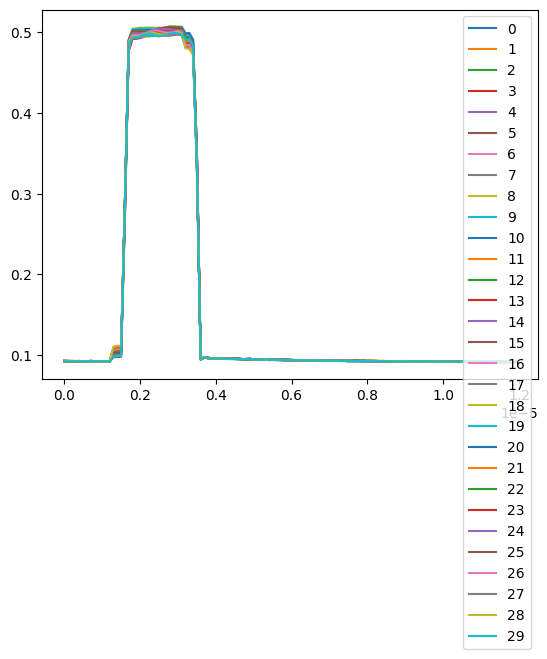

In [263]:
fig, ax = plt.subplots()
#ax.plot(data["times"], np.average(data["pre_excite_transmissions"][3], axis=0))
for kk in range(len(data["post_excite_transmissions"])):
    ax.plot(data["times"], np.average(data["post_excite_transmissions"][kk], axis=0), label=str(kk))
#ax.set_ylim(-0.005, 0.03)
ax.legend()
plt.show()

In [264]:
freqs_MHz =headers["params"]["probe_aom_frequencies"].to("MHz").magnitude

In [265]:
time_mask = np.bitwise_and(data["times"] > 2e-6, data["times"] < 3e-6)
pre_avgs = []
pre_stes = []
post_avgs = []
post_stes = []
for kk in range(len(data["post_excite_transmissions"])):
    # average over the selected time for each repeat
    average_pre = np.average(np.transpose(data["pre_excite_transmissions"][kk])[time_mask], axis=0)
    pre_avg = np.average(average_pre)
    pre_ste = np.std(average_pre) / np.sqrt(len(average_pre) - 1)
    average_post = np.average(np.transpose(data["post_excite_transmissions"][kk])[time_mask], axis=0)
    post_avg = np.average(average_post)
    post_ste = np.std(average_post) / np.sqrt(len(average_post) - 1)
    pre_avgs.append(pre_avg)
    pre_stes.append(pre_ste)
    post_avgs.append(post_avg)
    post_stes.append(post_ste)

pre_avgs = np.array(pre_avgs)
pre_stes = np.array(pre_stes)
post_avgs = np.array(post_avgs)
post_stes = np.array(post_stes)
diff_avgs = post_avgs - pre_avgs
diff_stes = np.sqrt(pre_stes**2 + post_stes**2)
ratio_diff_avgs = diff_avgs / pre_avgs
ratio_diff_stes = np.sqrt((diff_stes/pre_avgs)**2 + (pre_stes*diff_avgs/pre_avgs**2)**2)

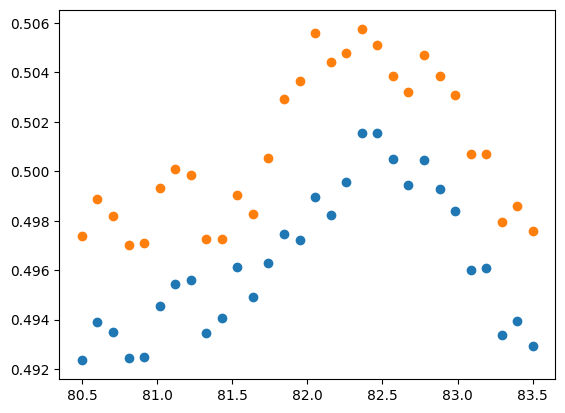

In [266]:
fig, ax = plt.subplots()
ax.errorbar(freqs_MHz, pre_avgs, pre_stes, ls="none", marker="o")
ax.errorbar(freqs_MHz, post_avgs, post_stes, ls="none", marker="o")
plt.show()

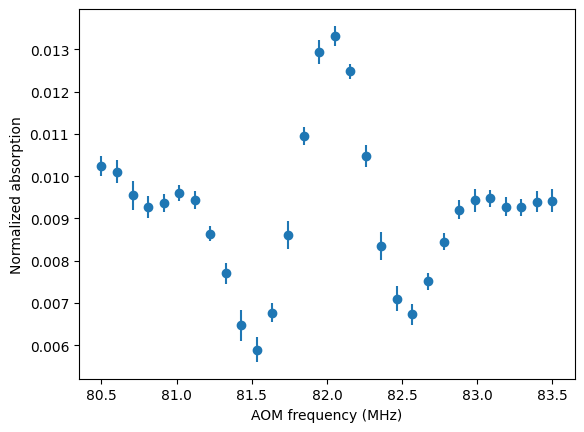

In [267]:
fig, ax = plt.subplots()
ax.errorbar(freqs_MHz, ratio_diff_avgs, ratio_diff_stes, ls="none", marker="o")
ax.set_xlabel("AOM frequency (MHz)")
ax.set_ylabel("Normalized absorption")
plt.show()

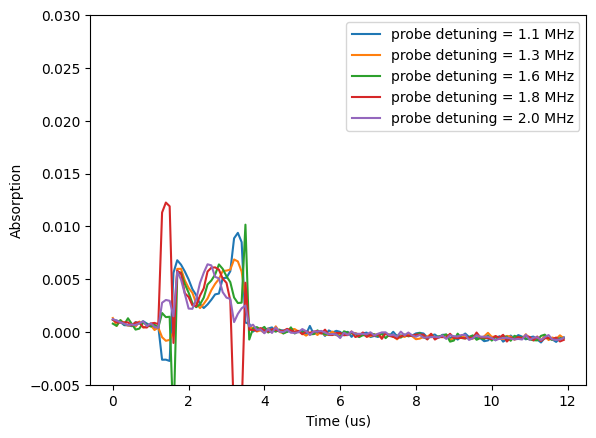

In [268]:
fig, ax = plt.subplots()
#ax.plot(data["times"], np.average(data["pre_excite_transmissions"][3], axis=0))
#for kk in range(len(data["post_excite_transmissions"])):
for kk in range(20, 25):
    probe_f = headers["params"]["probe_aom_frequencies"][kk]
    probe_detuning = (probe_f.to("MHz").magnitude - 82) * 2
    ax.plot(
        data["times"] * 1e6,
        np.average(data["post_excite_transmissions"][kk], axis=0) - np.average(data["pre_excite_transmissions"][kk], axis=0),
        label=f"probe detuning = {probe_detuning:.1f} MHz",
    )
ax.set_ylim(-0.005, 0.03)
ax.set_xlabel("Time (us)")
ax.set_ylabel("Absorption")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


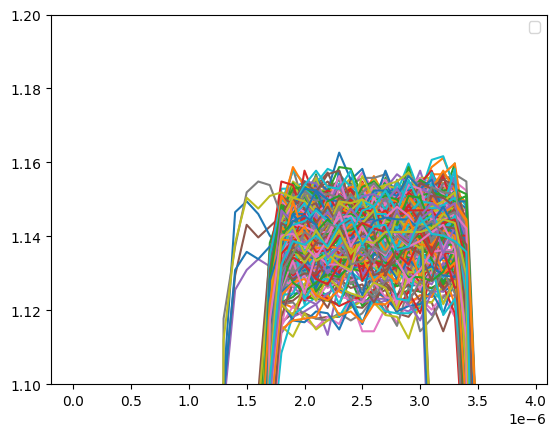

In [123]:
fig, ax = plt.subplots()
for kk in range(len(data["post_excite_transmissions"][3])):
    ax.plot(data["times"], data["post_excite_transmissions"][3][kk])
ax.set_ylim(1.1, 1.2)
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


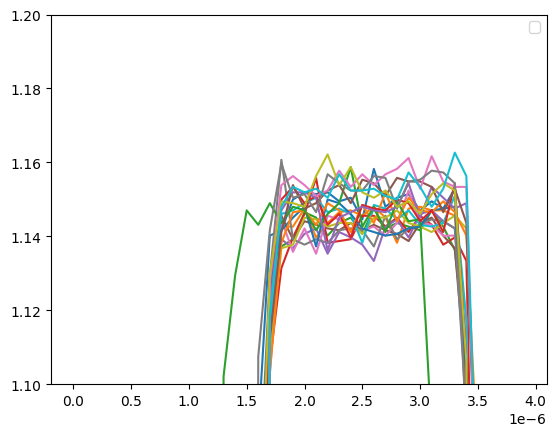

In [70]:
fig, ax = plt.subplots()
for kk in range(len(data["pre_excite_transmissions"][1])):
    ax.plot(data["times"], data["pre_excite_transmissions"][1][kk])
ax.set_ylim(1.1, 1.2)
ax.legend()
plt.show()